# There are 5 stages that in Predict Churn Rate Project:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. EDA
5. Data Pre-Processing
6. Modeling
7. Evaluation

**1. BUSINESS UNDERSTANDING**

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Content:

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

**2. DATA UNDERSTANDING**

Import Necessary Library

In [ ]:
# Library Process Data
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
# Library Visualize Data
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as pe
import warnings
warnings.filterwarnings("ignore")
# Library for predict model
! pip install category_encoders
! pip install imbalanced-learn
import sklearn
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, plot_confusion_matrix
from imblearn.over_sampling import SMOTE, SVMSMOTE
from sklearn.svm import SVC
# Statistical Test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy import stats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import Data

In [ ]:
data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df = data.copy()
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2552,3547-LQRIK,Female,0,Yes,No,47,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,26.90,1250.85,No
5492,2799-TSLAG,Female,0,Yes,Yes,65,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),25.30,1748.55,No
4923,6075-QMNRR,Female,0,No,No,52,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),49.75,2535.55,No
2234,4500-HKANN,Male,0,Yes,Yes,23,Yes,Yes,DSL,No,...,No,Yes,No,No,Two year,No,Mailed check,59.70,1414.2,No
3903,5206-XZZQI,Male,0,No,No,53,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,80.60,4348.1,No


In [ ]:
# Number of customers
print("Number Of Customers Are " + str(df["customerID"].nunique())) 

Number Of Customers Are 7043


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.duplicated().value_counts()

False    7043
dtype: int64

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**3. DATA PREPARATION**

In [ ]:
df.drop(df.columns[[0]],axis=1,inplace=True)

In [ ]:
df['TotalCharges'] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [ ]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({0:"No",1:"Yes"})

In [ ]:
# Missing Rows of NaN
df.dropna(subset=["TotalCharges"],how="all",inplace=True)

In [ ]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
# MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies have both No and No internet service which as the same => No
value_count = []
lists = ["MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
for i in lists:
  a= df[i].value_counts()
  value_count.append(a)
print(value_count)

[No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64, No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64, No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64, No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64, No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64, No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64, No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64]


In [ ]:
# MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies have both No and No internet service which as the same => No
lists = ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
for i in lists:
  df[i] = df[i].replace("No internet service","No")

df["MultipleLines"] = df["MultipleLines"].replace("No phone service","No")  

In [ ]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5805,Male,Yes,Yes,No,19,Yes,No,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Bank transfer (automatic),66.40,1286.05,No
1955,Female,No,Yes,Yes,49,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.40,4613.95,No
3859,Female,No,No,No,54,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,Yes,Bank transfer (automatic),94.75,5121.75,No
713,Female,No,No,Yes,14,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,86.00,1164.05,No
4208,Male,No,Yes,No,69,No,No,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),60.80,4263.40,No


**4. DATA EXPLORATION**

In [ ]:
object_columns = [i for i in df.columns if df[i].dtype == 'O']
print(object_columns)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [ ]:
numeric_columns = [i for i in df.columns if df[i].dtype != 'O']
print(numeric_columns)

['tenure', 'MonthlyCharges', 'TotalCharges']


Bar chart of object_columns

In [ ]:
df["InternetService"].count()

7032

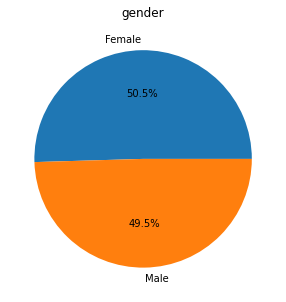

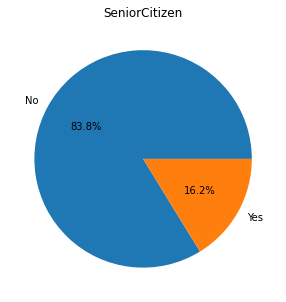

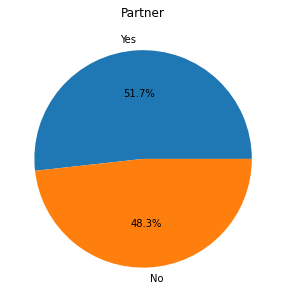

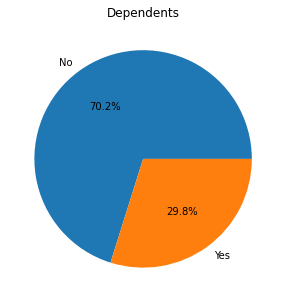

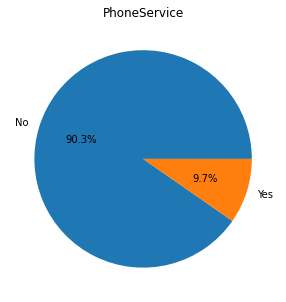

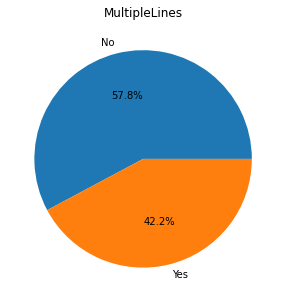

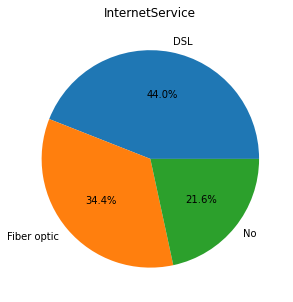

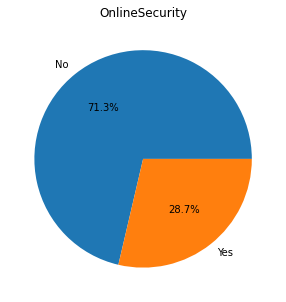

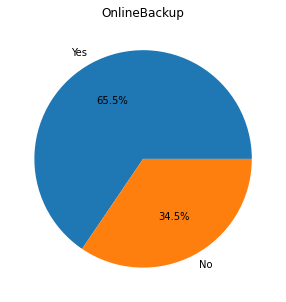

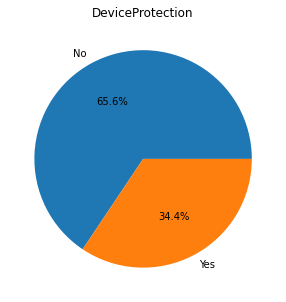

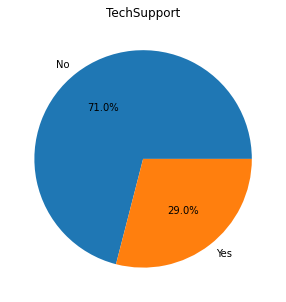

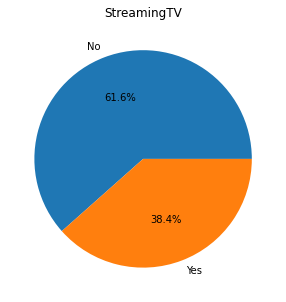

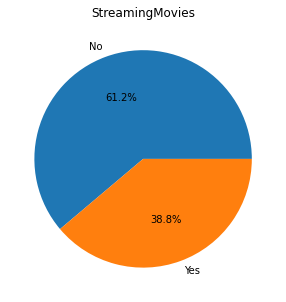

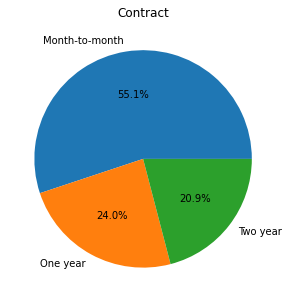

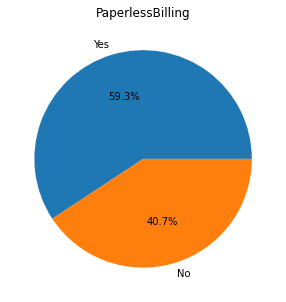

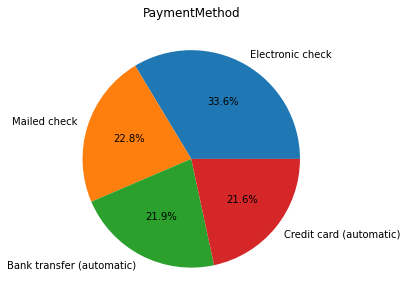

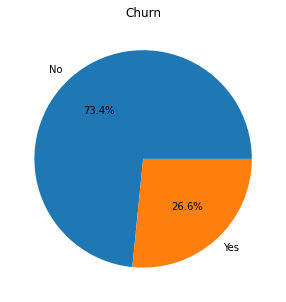

In [ ]:
for i in object_columns:
  plt.figure(figsize=(12,5))
  plt.pie(df[i].value_counts(),labels= df[i].unique(),autopct='%1.1f%%',data=df)
  plt.title(i)
  plt.show()

In this dataset:
- The same portion of gender between male and female
- The most users are young (83%)
- The most users are not dependent (70%)
- Above 90% users are not using PhoneService, 57.8% not use Multiple, 71% not use OnlineSecurity, 65.6% not use DeviceProtection and 71% not supported by tech. But 65% use OnlineBackup
- Above 61% users don't use StreamTV and StreamMovies
- 55% users register Month to Month contract. The orders register One year and Two years
- The nearly same portion among Electronic Check, Mailed Check, Bank Transfer and Credit Card

=> 73% users in this dataset who are churn customer, just 27% are loyal customer

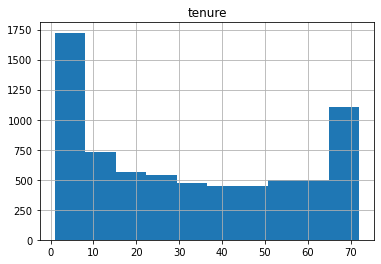

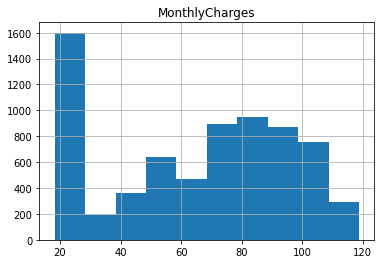

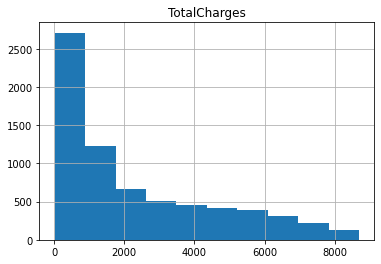

In [ ]:
for i in numeric_columns:
  df[i].hist()
  plt.title(i)
  plt.show()

Some features affect directly to churn 

In [ ]:
# Groupby numeric cols with churn
groupby_numeric = df.groupby(by = df["Churn"])["tenure"].count()
groupby_numeric

Churn
No     5163
Yes    1869
Name: tenure, dtype: int64

<Figure size 864x360 with 0 Axes>

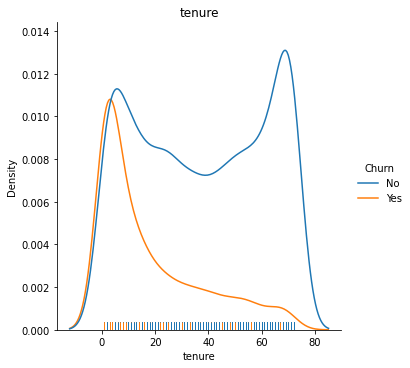

<Figure size 864x360 with 0 Axes>

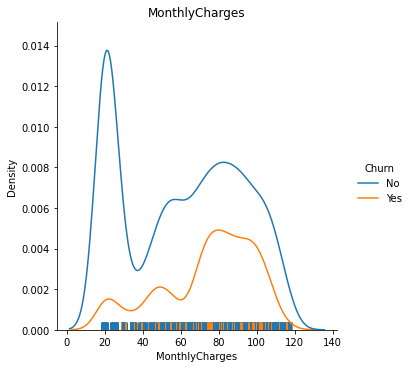

<Figure size 864x360 with 0 Axes>

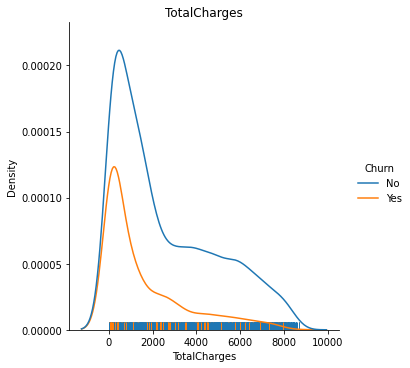

In [ ]:
for cols in numeric_columns:  
  plt.figure(figsize=(12,5))
  sns.displot(x=df[cols],hue = "Churn", rug = True, kind = "kde", data=df)
  plt.title(cols)
  plt.show()

- [0,20] is the peak of tenure that the churn customer. Beside that, [0,20] and [70-80] is the peak of tenure that loyal customer  
- [0,40] is the peak of monnthly charges that loyal customer ppay for company and [60,120] is the peak with churn customers
- Bot churn and loyal customers have the peak of total charges is [0,2000]

In [ ]:
import plotly.graph_objs as go
from plotly import tools

In [ ]:
df.groupby(by=["PaymentMethod","Churn"])["Churn"].count()

PaymentMethod              Churn
Bank transfer (automatic)  No       1284
                           Yes       258
Credit card (automatic)    No       1289
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1296
                           Yes       308
Name: Churn, dtype: int64

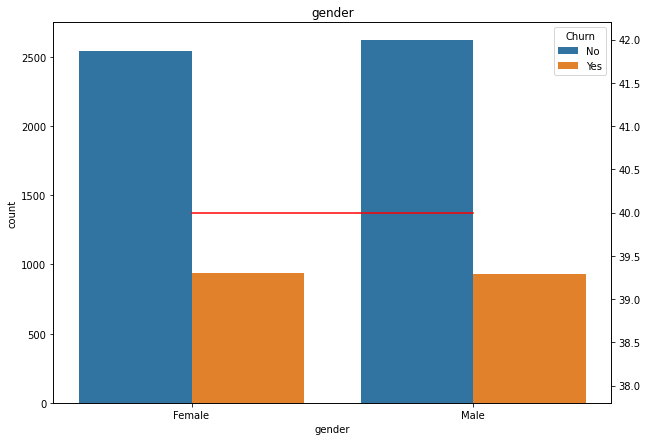

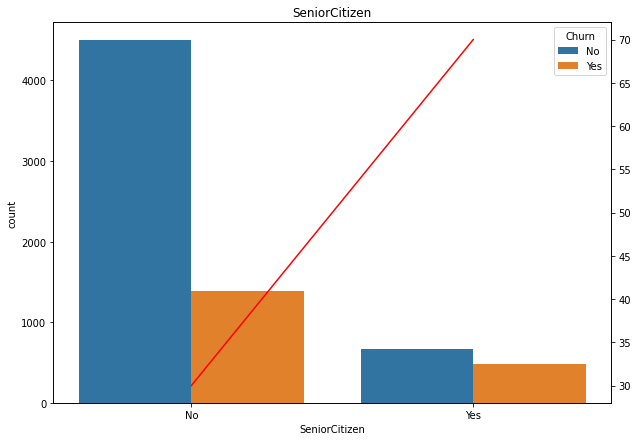

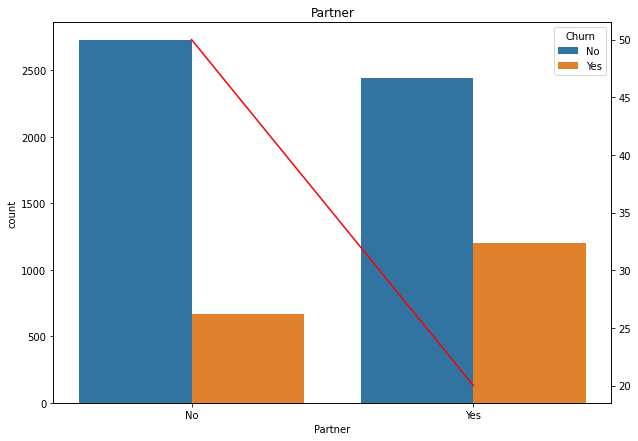

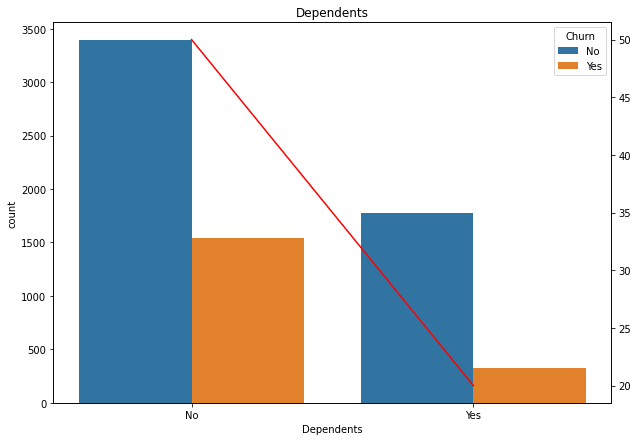

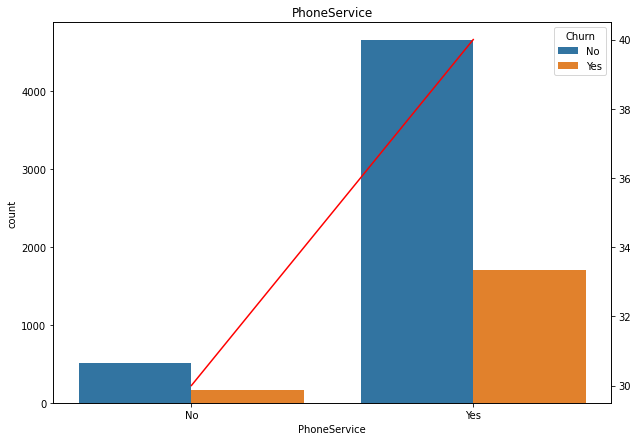

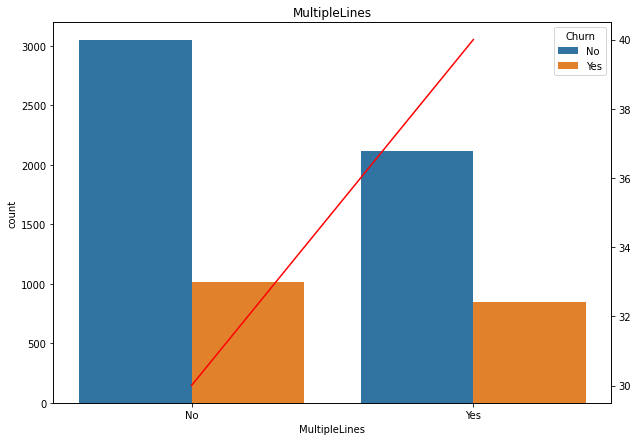

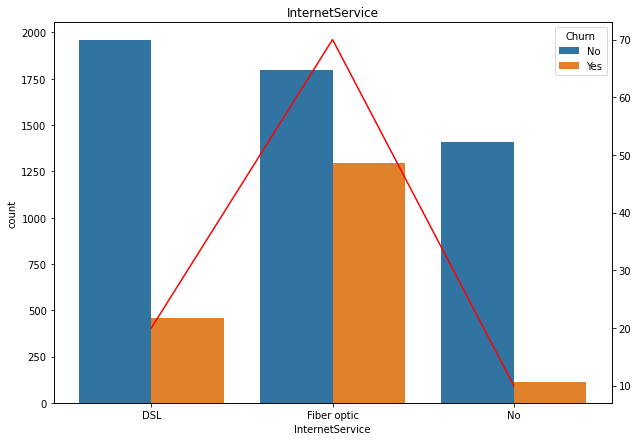

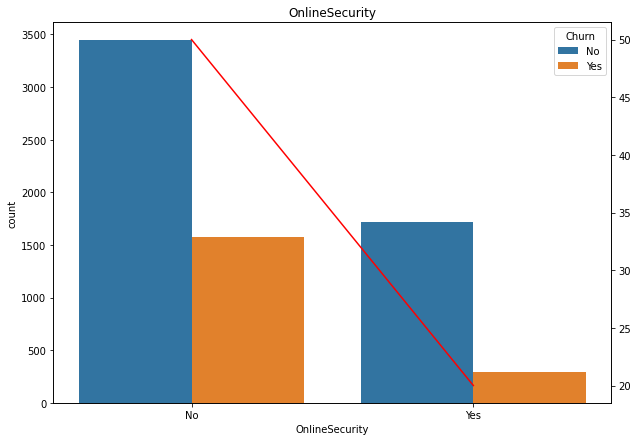

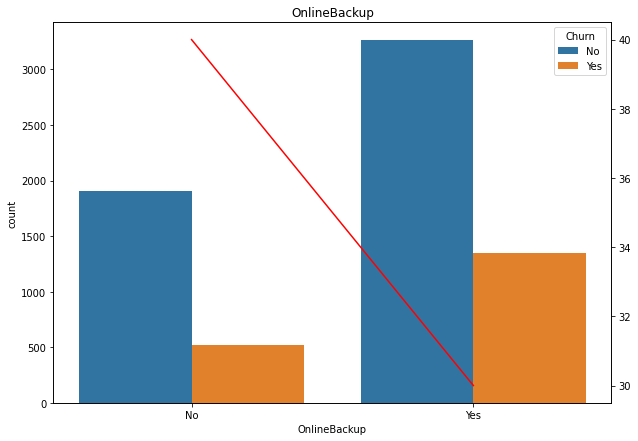

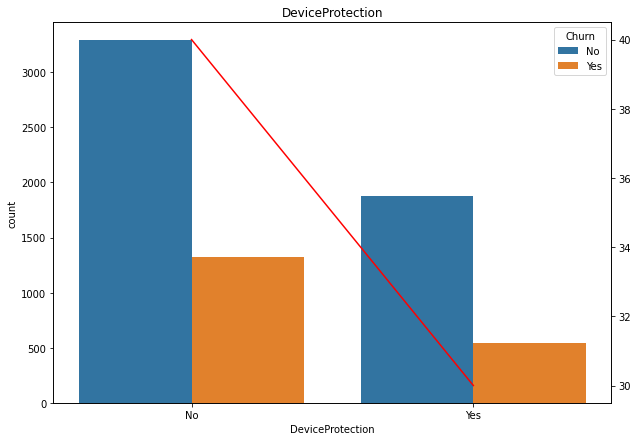

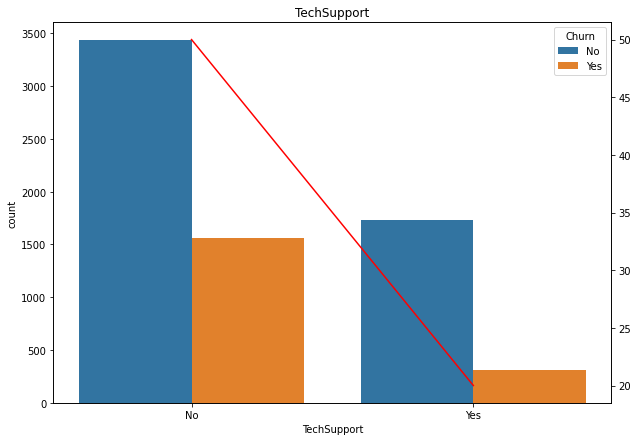

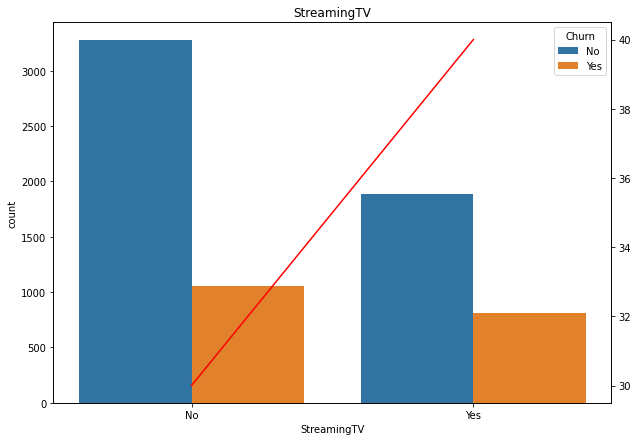

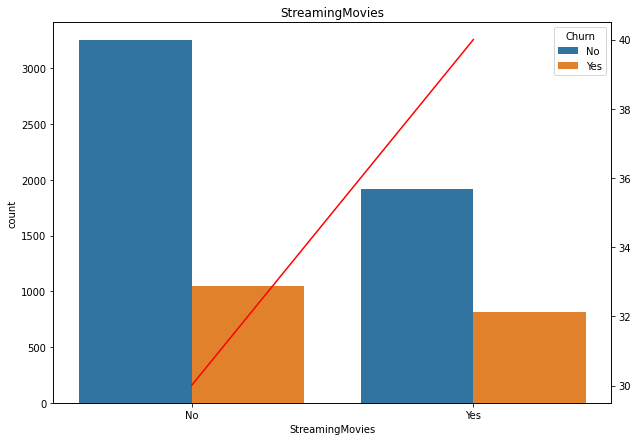

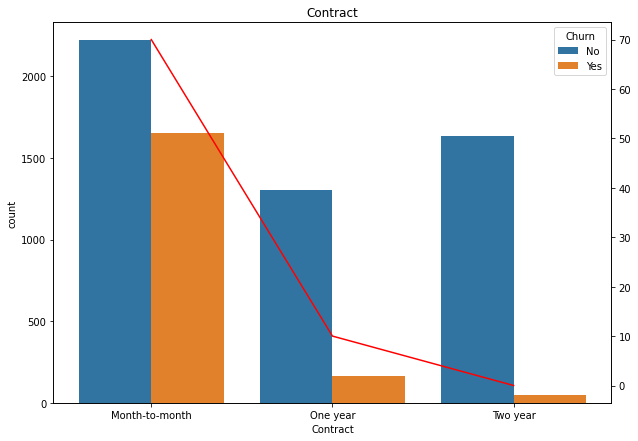

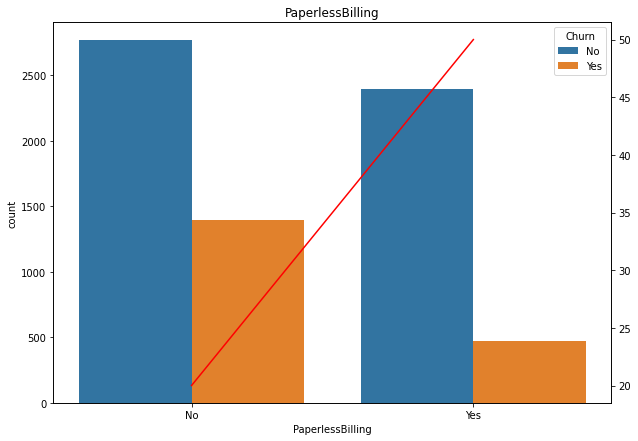

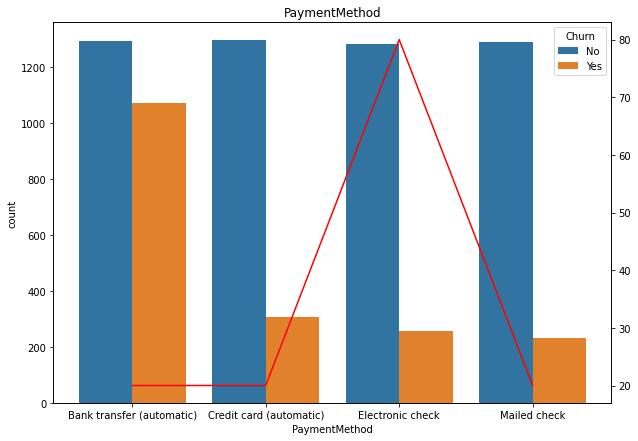

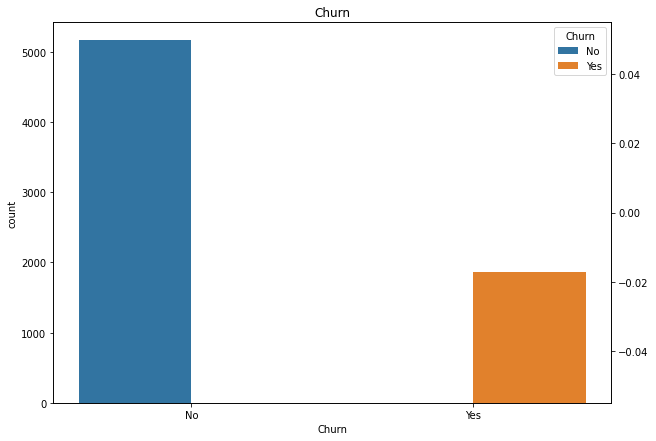

In [ ]:
for i in object_columns:
  churn = df[df["Churn"] == "Yes"]
  no_churn = df[df["Churn"] == "No"]
  churn_count = churn[i].value_counts().sort_index()
  no_churn_count = no_churn[i].value_counts().sort_index()
  churn_ratio = round(churn_count/no_churn_count,1)*100
  plt.figure(figsize=(10,7))
  ax = sns.countplot(df[i],hue="Churn",data=df)
  ax1 = ax.twinx()
  ax1.plot(churn_ratio,color="red")
  plt.title(i)
  plt.show()


To evaluate the effectiveness of customer retention, I use churn ratio (churn/no churn) instead if churn rate (only evaluate the size of each group, not the effectiveness)

- Gender is not affected to churn ratio
- Churn ratio of younger users is lower than older users
- Churn ratio having partner is lower
- Churn ratio of dependent users is lower
- Using phone service, multiplelines, streamingtv and streamingmovie have higher churn ratio
- Fiber Optic is the method of InternetService that have a higest churn ratio
- Using online security, online backup, divice protect, techsupport,  have lower churn ratio
- The churn rate gradually decrease with Month to Month, 1 year, 2 years contract
- Banktranfer and creditcard with lowest churn ratio, electronic check have highest churn ratio

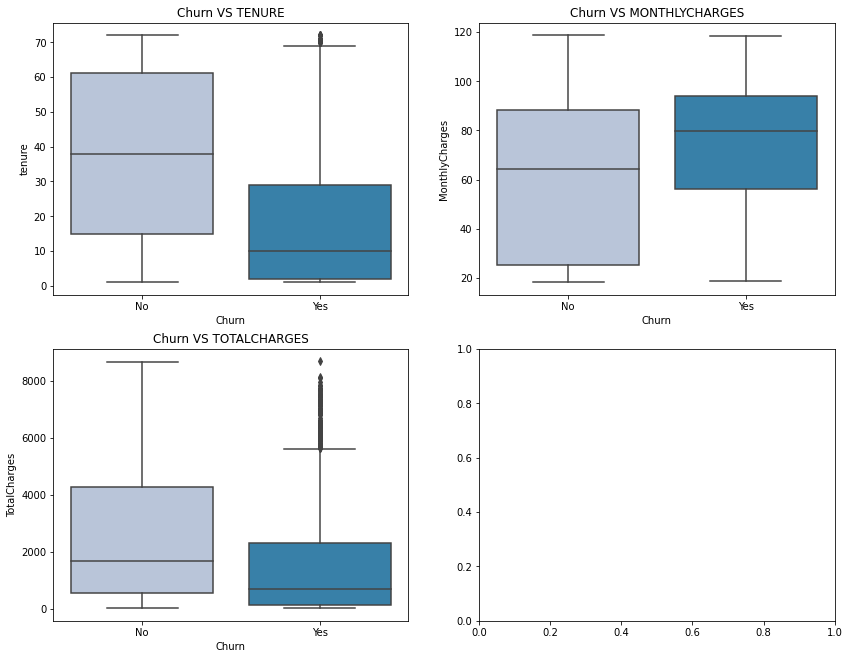

In [ ]:
# FIND OUTLIERS
fig1, axes1 =plt.subplots(2,2,figsize=(14, 11))
#select all quantitative columns for checking the spread
for i in range(len(numeric_columns)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(y=df[numeric_columns[i]],x=df['Churn'],ax=ax,palette="PuBu",orient='v').set(title='Churn VS '+ numeric_columns[i].upper()  )

- Churn Yes have the higher central tendency of tenure (median) but appear more upper outliers. While Churn No pretty well balanced => Loyal Customer usually use higher tenure (50% sample use more 35), and 75% Customer leaving use lower 30
- Churn Yes pay more MonthlyCharges and less volatility than Churn No
- Churn Yes pay less TotalCharges and less volatility than Churn No. Meanwhile, Churn Yes appear much outliers 

No have outlier values

Total Charges Each Payment Methods

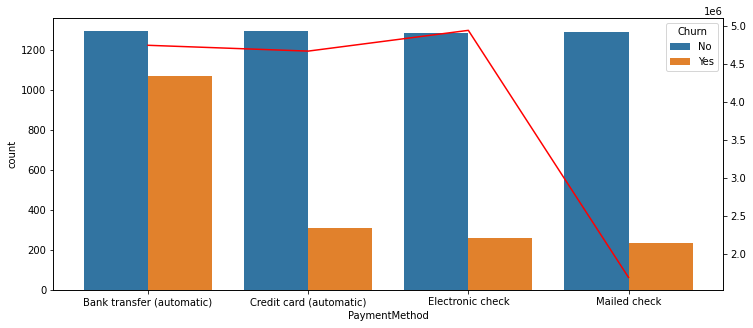

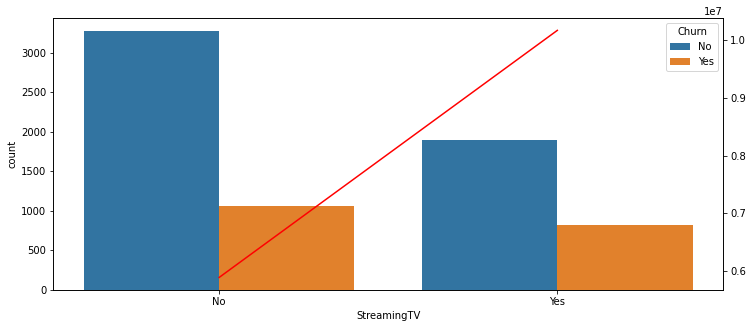

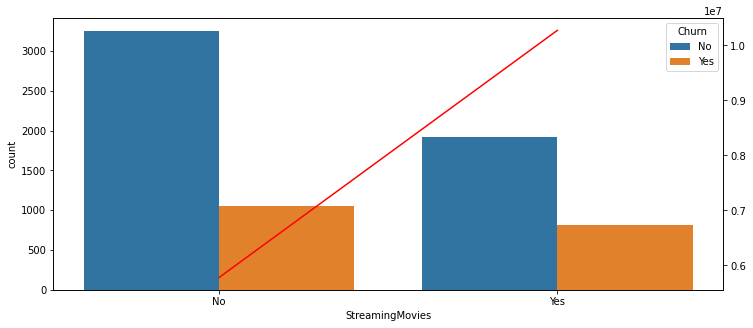

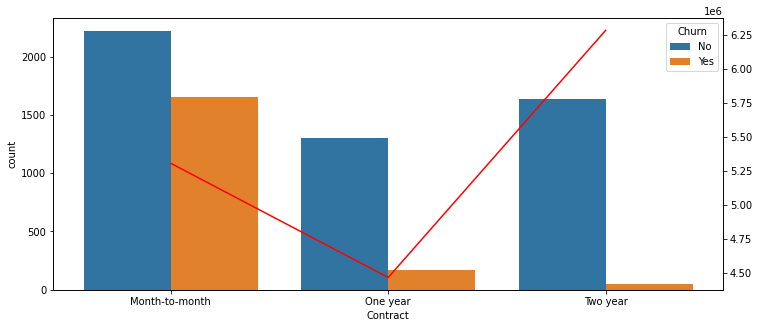

In [ ]:
lists = ["PaymentMethod","StreamingTV",	"StreamingMovies",	"Contract"]
for i in lists:
  charges = df.groupby(by=df[i])["TotalCharges"].sum()
  fig,ax = plt.subplots(figsize=(12,5))
  ax = sns.countplot(df[i],hue="Churn",data=df)
  ax1 = ax.twinx()
  ax1.plot(charges,color="red")

Overall, we can easily see:
- Paying by Bank Transfer, Credit Card and Electronic account for most of total charges from customers. Also, Bank Transfer, Credit Card have a lowest churn ratio. While Electronic Check is so high

=> Focus on Bank Transfer and Credit Card if we want to improve churn rate and revenue for company

- Users use StreamingTV and Streaming Movie bring more revenue for the company. But also the churn ratio really high => More Risk More Profit

- Duration of Contract that users sign almost Month to Month. However, contracts of more than 2 years bring high total charges to the company and this is the most loyal customers of the company => Maybe maintain this group users have a contract with duration above 2 years

EXPLORE GROUP OF TENURE

In [ ]:
df["group_tenure"] = pd.cut(df["tenure"],3,labels=["1-24","24-48","48-72"])

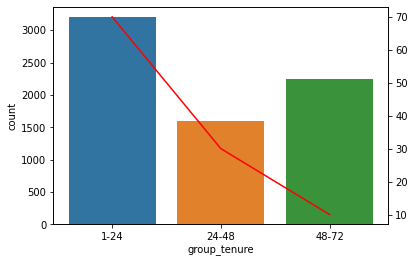

In [ ]:
# Count Each Group Of Tenure
churn = df[df["Churn"] == "Yes"]
no_churn = df[df["Churn"] == "No"]
churn_count = churn["group_tenure"].value_counts().sort_index()
no_churn_count = no_churn["group_tenure"].value_counts().sort_index()
churn_ratio = round(churn_count/no_churn_count,1)*100
ax = sns.countplot(df["group_tenure"])
ax1 = ax.twinx()
ax1.plot(churn_ratio,color="red")
plt.show()

The users force on 2 groups "1-24" and "48-72", but the gap of churn ratio between these 2 group is really widen (70% and 10%) 
=> New users maybe have multiple choices so the higher ability that this group exists from the company. The longest users use to use the company's service will continuously stay

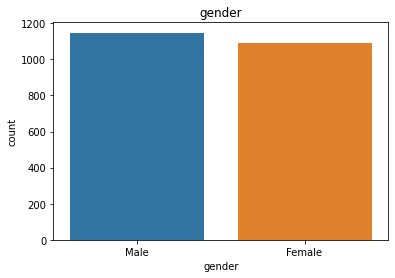

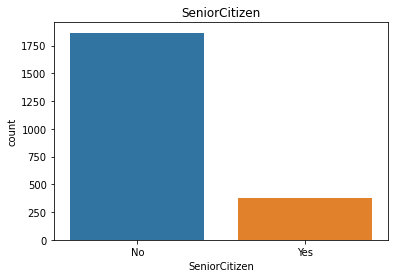

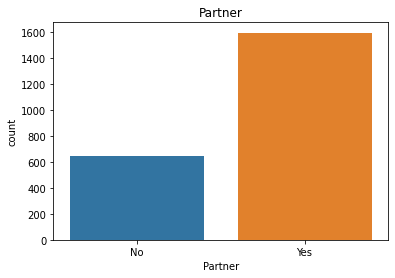

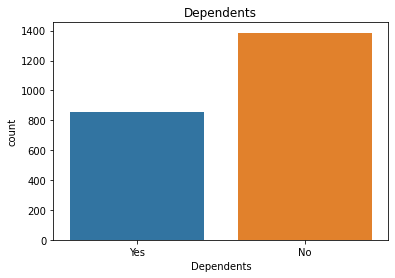

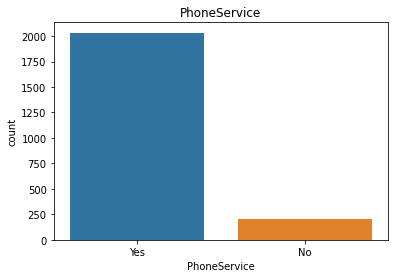

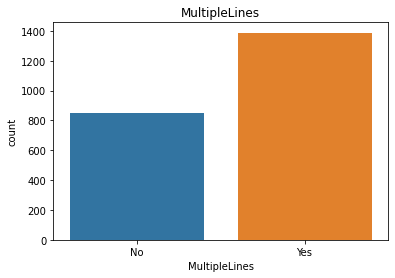

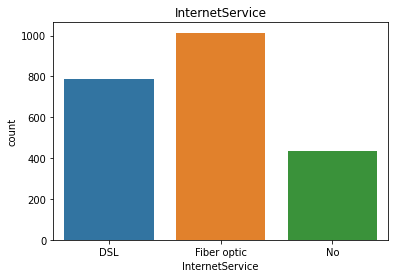

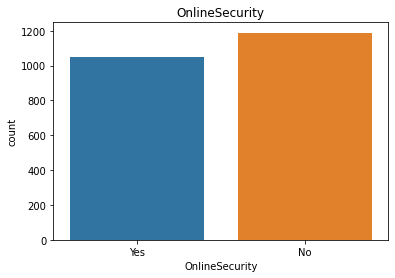

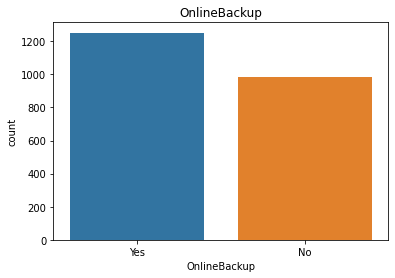

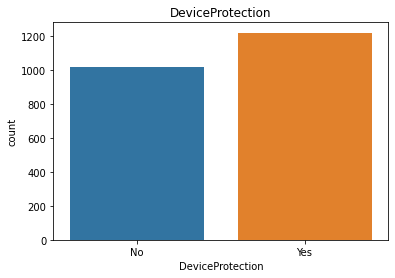

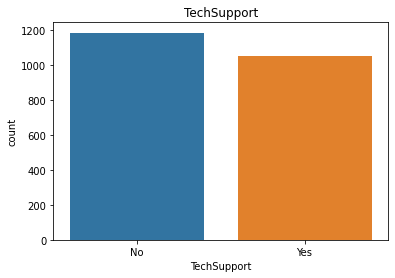

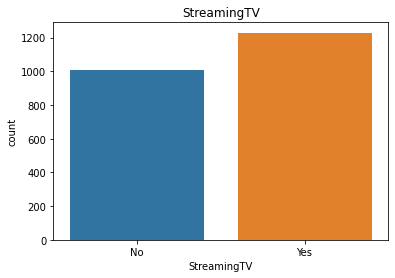

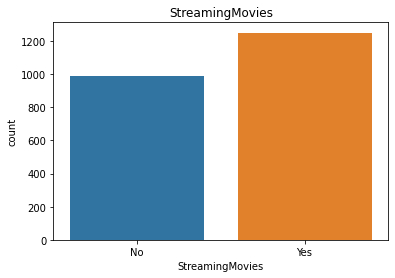

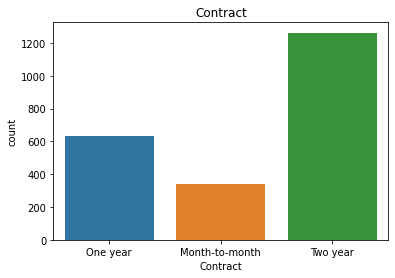

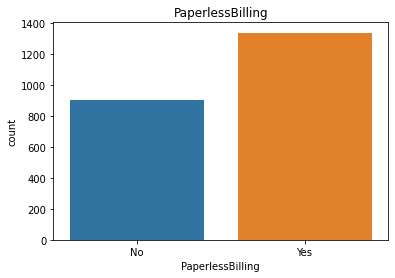

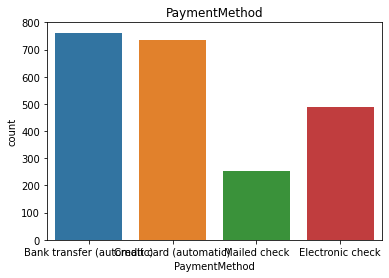

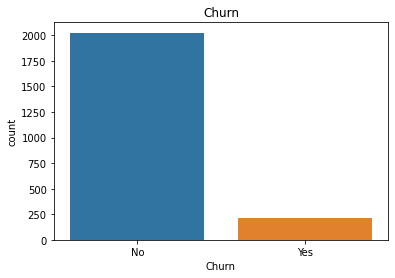

In [ ]:
# Explore 3 group_tenure
df_long = df[df["group_tenure"] == "48-72"]

for i in object_columns:
  ax = sns.countplot(df_long[i],data=df_long)
  plt.title(i)
  plt.show()

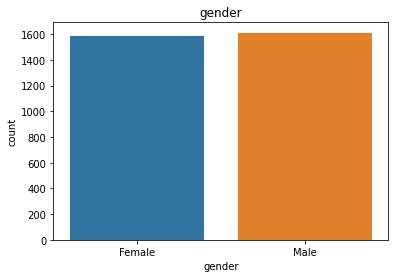

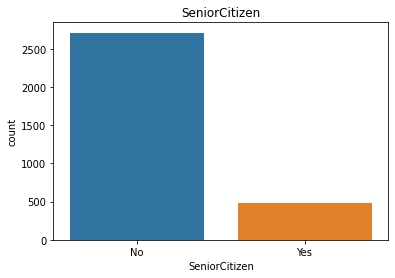

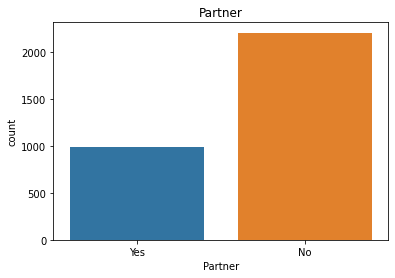

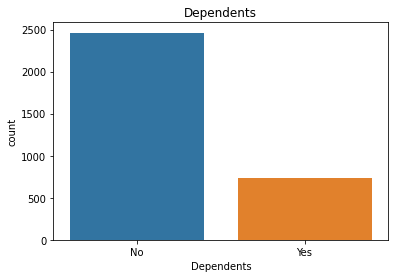

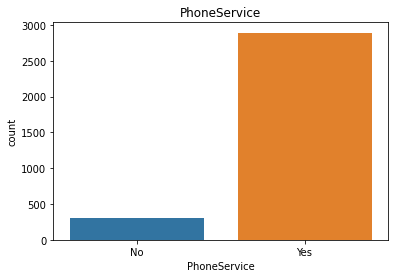

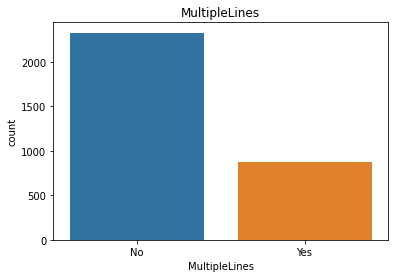

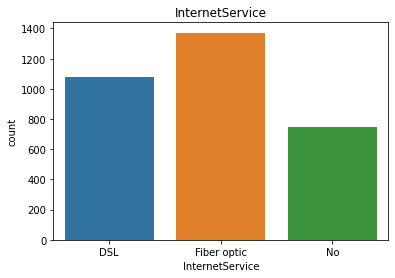

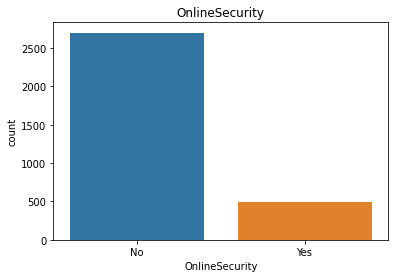

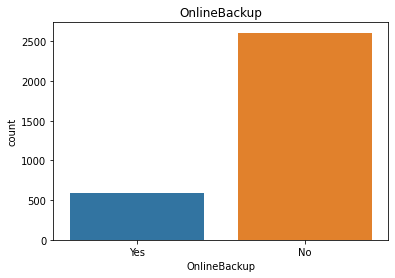

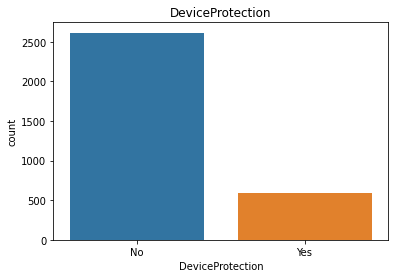

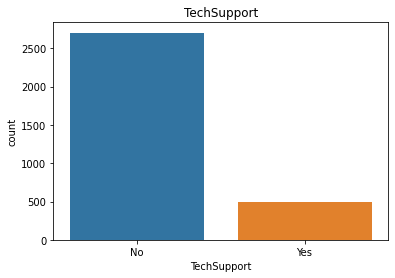

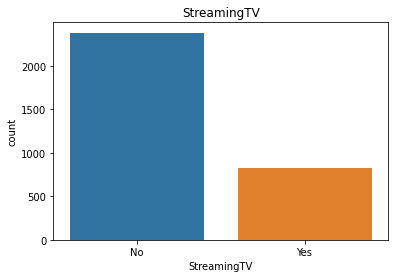

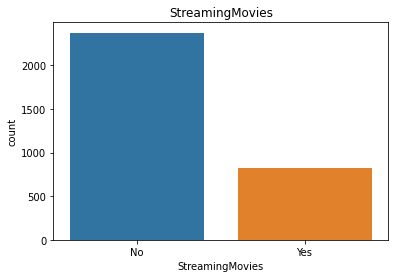

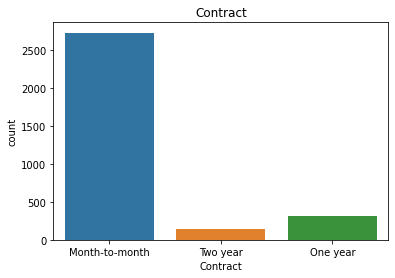

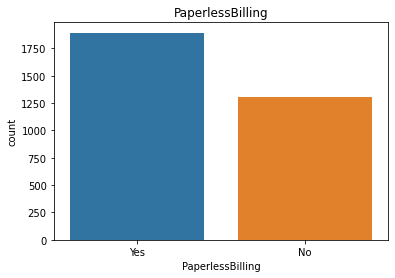

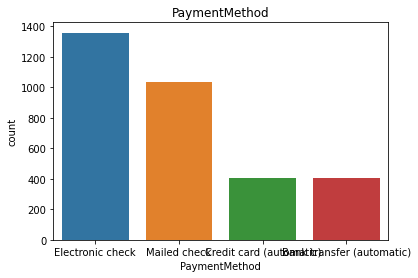

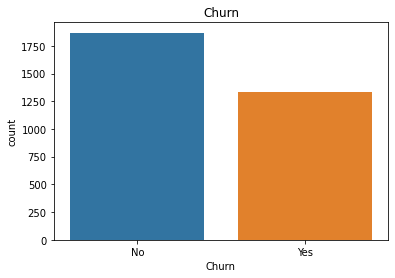

In [ ]:
df_short = df[df["group_tenure"] == "1-24"]
for i in object_columns:
  sns.countplot(df_short[i],data=df_short)
  plt.title(i)
  plt.show()

In [ ]:
# How group_tenure affact to churn ratio

We compare between group 1-24 and 48-72 to explain why the widen gap churn ratio

The Same:
- Both 2 groups focus on younger users ( No Senior Citizen ). More specific on dependent citizen
- Both groups also have almost of users using Phone Service 
- Users like using Fiber Optic rather than DSL 

The Difference:
- The longest users focus on having **partner**. In contrast, almost of short-term users are No partner
- In similar, the longest users like using **MultipleLines** but short-term users are not
- The longest users like using **Online Backup** but short-term users are not
- For some services such as **Device Protect, Tech Support, Streaming TV or Movies**. The ratio between users and non-users **is equal**, but almost short-term users dislike using
- Bulk of long-term users sign contract with **duration above 1 year**. And short-term one just sign Month To Month contract
- Long-term users like paying cost by **bank transfer, credit card**. In contrast, short-term users like electric check and mail check method

=> In short, the churn ratio of long-term users is 10% and short-term one is 70% 


HYPOTHESIS TESTING

Correlation test between category variables and target variable which is Churn

=> Using Chi-Square method

In [ ]:
for i in object_columns:
  crosstab = pd.crosstab(df[i],df["Churn"])
  stat,p,dof,expected = chi2_contingency(crosstab, correction = True)
  print(f'Correlation Between {i} And Churn')
  print('')
  print(f'p-value : {p}, degree of freedom : {dof}')
  print('-'*30)
  # Test
  prob = 0.95
  critical = chi2.ppf(prob,dof)
  print('probability = %.3f, critical = %.3f, p = %.3f' % (stat,critical,p))
  print('-'*30)
  if abs(stat) >= critical:
    print('Two Sample Are Dependent')
  else:
    print('Two Sample Are Independent')
  print('-'*30)

Correlation Between gender And Churn

p-value : 0.4904884707065509, degree of freedom : 1
------------------------------
probability = 0.475, critical = 3.841, p = 0.490
------------------------------
Two Sample Are Independent
------------------------------
Correlation Between SeniorCitizen And Churn

p-value : 2.4792557203954705e-36, degree of freedom : 1
------------------------------
probability = 158.441, critical = 3.841, p = 0.000
------------------------------
Two Sample Are Dependent
------------------------------
Correlation Between Partner And Churn

p-value : 3.97379757451591e-36, degree of freedom : 1
------------------------------
probability = 157.503, critical = 3.841, p = 0.000
------------------------------
Two Sample Are Dependent
------------------------------
Correlation Between Dependents And Churn

p-value : 2.0196592017051303e-42, degree of freedom : 1
------------------------------
probability = 186.322, critical = 3.841, p = 0.000
-----------------------------

Expect for Gender and Phoneservice are independent with Churn. The rest of features are dependent with Churn

Correlation between numeric variables and target variables

=> Using ANOVA method 

In [ ]:
for i in numeric_columns:
  yes_churn = df["tenure"][df["Churn"]== "Yes"]
  no_churn = df["tenure"][df["Churn"] == "No"]
  stat,p = stats.f_oneway(yes_churn,no_churn)
  print(f'Correlation Between {i} And Churn')
  print('-'*30)
  print('stat = %.3f, p = %.3f' % (stat,p))
  print('-'*30)
  if p > 0.05:
    print("Independent")
  else:
    print("Dependent")
  print('-'*30)

Correlation Between tenure And Churn
------------------------------
stat = 1007.509, p = 0.000
------------------------------
Dependent
------------------------------
Correlation Between MonthlyCharges And Churn
------------------------------
stat = 1007.509, p = 0.000
------------------------------
Dependent
------------------------------
Correlation Between TotalCharges And Churn
------------------------------
stat = 1007.509, p = 0.000
------------------------------
Dependent
------------------------------


Both Tenure, MonthlyCharges and TotalCharges are dependent with Churn

**6. DATA PRE-PROCESSING**

In [ ]:
df_train = df.copy()
df_train = df_train.drop(["gender","PhoneService"],axis=1)

In [ ]:
# Transform object_columns to 0,1
# Transform numeric_columns to [0,1] (by MaxMinScaler method)
df_train = pd.get_dummies(df_train,drop_first=True)
df_train.sample(5)

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,group_tenure_24-48,group_tenure_48-72
2565,13,25.0,332.50,0,1,1,1,0,1,0,...,0,0,1,1,0,0,0,0,0,0
1573,47,96.1,4391.45,0,1,1,0,1,0,1,...,1,1,0,1,0,1,0,0,1,0
4845,20,39.4,825.40,0,1,1,0,0,0,1,...,0,0,1,1,1,0,0,0,0,0
3071,47,90.5,4318.35,0,1,1,1,0,0,1,...,1,0,1,1,0,0,1,0,1,0
6008,15,19.5,239.75,0,1,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0


In [ ]:
cols = ["tenure","MonthlyCharges","TotalCharges"]
scaler = MinMaxScaler()
df_train[cols] = scaler.fit_transform(df_train[cols])

In [ ]:
corr = df_train.corr()
corr.style.background_gradient(cmap ="coolwarm").set_precision(2)

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,group_tenure_24-48,group_tenure_48-72
tenure,1.00,0.25,0.83,0.02,0.38,0.16,0.33,0.02,-0.04,0.33,0.36,0.36,0.33,0.28,0.29,0.20,0.56,0.00,0.23,-0.21,-0.23,-0.35,0.08,0.85
MonthlyCharges,0.25,1.00,0.65,0.22,0.10,-0.11,0.49,0.79,-0.76,0.30,0.44,0.48,0.34,0.63,0.63,0.00,-0.07,0.35,0.03,0.27,-0.38,0.19,0.02,0.21
TotalCharges,0.83,0.65,1.00,0.10,0.32,0.06,0.47,0.36,-0.37,0.41,0.51,0.52,0.43,0.52,0.52,0.17,0.36,0.16,0.18,-0.06,-0.29,-0.20,0.03,0.72
SeniorCitizen_Yes,0.02,0.22,0.10,1.00,0.02,-0.21,0.14,0.25,-0.18,-0.04,0.07,0.06,-0.06,0.11,0.12,-0.05,-0.12,0.16,-0.02,0.17,-0.15,0.15,0.02,0.01
Partner_Yes,0.38,0.10,0.32,0.02,1.00,0.45,0.14,0.00,-0.00,0.14,0.14,0.15,0.12,0.12,0.12,0.08,0.25,-0.01,0.08,-0.08,-0.10,-0.15,0.03,0.31
Dependents_Yes,0.16,-0.11,0.06,-0.21,0.45,1.00,-0.02,-0.16,0.14,0.08,0.02,0.01,0.06,-0.02,-0.04,0.07,0.20,-0.11,0.06,-0.15,0.06,-0.16,0.02,0.12
MultipleLines_Yes,0.33,0.49,0.47,0.14,0.14,-0.02,1.00,0.37,-0.21,0.10,0.20,0.20,0.10,0.26,0.26,-0.00,0.11,0.16,0.06,0.08,-0.23,0.04,0.02,0.27
InternetService_Fiber optic,0.02,0.79,0.36,0.25,0.00,-0.16,0.37,1.00,-0.47,-0.03,0.17,0.18,-0.02,0.33,0.32,-0.08,-0.21,0.33,-0.05,0.34,-0.31,0.31,0.01,0.02
InternetService_No,-0.04,-0.76,-0.37,-0.18,-0.00,0.14,-0.21,-0.47,1.00,-0.33,-0.38,-0.38,-0.34,-0.41,-0.42,0.04,0.22,-0.32,0.00,-0.28,0.32,-0.23,-0.01,-0.03
OnlineSecurity_Yes,0.33,0.30,0.41,-0.04,0.14,0.08,0.10,-0.03,-0.33,1.00,0.28,0.27,0.35,0.18,0.19,0.10,0.19,-0.00,0.12,-0.11,-0.08,-0.17,0.01,0.28


The degree of correlation between Churn_Yes and other variables is not significant. Meanwhile, because of no corellation between Churn and gender, PhoneService so we can drop it from model

In [ ]:
for i in df_train.columns:
  print(f'{i:} : {df_train[i].unique()}')

tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
MonthlyCharges : [0.11542289 0.38507463 0.35422886 ... 0.44626866 0.25820896 0.60149254]
TotalCharges : [0.0012751  0.21586661 0.01031041 ... 0.03780868 0.03321025 0.78764136]
SeniorCitize

**7. Modeling**

We will try out model by 2 methods:
1. Upsampling = SMOTE, Scale = MinMax and logistic Regression
2. Using SVM

METHOD 1

In [ ]:
# SMOTE & Scale
X = df_train.drop(["Churn_Yes"],axis=1)
y = df_train['Churn_Yes']

# CSplit train ,test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# Upsampling = SMOTE
sm = SMOTE(k_neighbors=5)
X_train_resample, y_train_resample = sm.fit_resample(X_train,y_train)

In [ ]:
y_train.value_counts()

0    4123
1    1502
Name: Churn_Yes, dtype: int64

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1040
           1       0.54      0.81      0.64       367

    accuracy                           0.77      1407
   macro avg       0.73      0.78      0.74      1407
weighted avg       0.82      0.77      0.78      1407



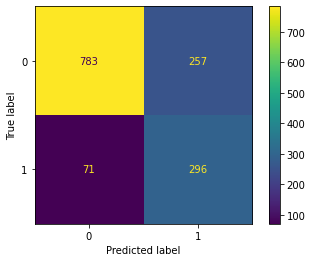

In [ ]:
# Logistic Regression
model_log = LogisticRegression() 
model_log.fit(X_train_resample, y_train_resample)
y_pred = model_log.predict(X_test)

# Print Results
print(classification_report( y_test, y_pred))

plot_confusion_matrix(model_log, X_test, y_test)

METHOD 2: SVM

In [ ]:
# SMOTE & Scale
X_svc = df_train.drop(["Churn_Yes"],axis=1)
y_svc = df_train['Churn_Yes']

# CSplit train ,test
X_train,X_test,y_train,y_test = train_test_split(X_svc,y_svc,test_size=0.2)
# Upsampling = SMOTE
sm = SMOTE(k_neighbors=5)
X_train_resample, y_train_resample = sm.fit_resample(X_train,y_train)

              precision    recall  f1-score   support

           0       0.75      0.60      0.67      1062
           1       0.24      0.39      0.30       345

    accuracy                           0.55      1407
   macro avg       0.50      0.50      0.48      1407
weighted avg       0.63      0.55      0.58      1407



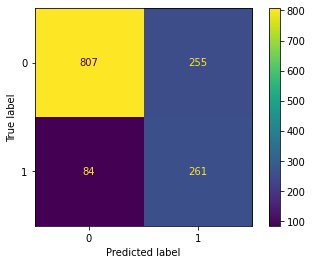

In [ ]:
# SVC
model_svc = SVC() 
model_svc.fit(X_train_resample, y_train_resample)
y_pred_svc = modelsvc.predict(X_test)

# Print Results
print(classification_report( y_test, y_pred))

plot_confusion_matrix(model_svc, X_test, y_test)